In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [14]:
import pandas as pd
import datetime as dt
import seaborn as sns
from pymea import plotting
from pymea import matlab_compatibility as mc
from matplotlib import pyplot as plt

In [42]:
data_path = '/media/sam/hdd1/maestro_recordings/016/016_minute_binsize.csv'
start_times_path = '/media/sam/hdd1/maestro_recordings/016/016_start_times.csv'
data_table = pd.read_csv(data_path)

In [43]:
start_times = pd.read_csv(start_times_path)
start_times = start_times['Var1'].map(mc.datetime_str_to_datetime)

In [4]:
def is_even(num):
    return num % 2 == 0

def ttx_filter(name):
    row_num, col_num = mc.get_row_col_number_tuple(name)
    return (is_even(row_num) and is_even(col_num)) or not (is_even(row_num) or is_even(col_num))
    
def no_ttx_filter(name):
    row_num, col_num = mc.get_row_col_number_tuple(name)
    return(is_even(row_num) and not is_even(col_num)) or (not is_even(row_num) and is_even(col_num))

In [5]:
filter_dict = {
    'ttx': ttx_filter,
    'no_ttx': no_ttx_filter
}

In [6]:
condition_mat = plotting.construct_categorized_dataframe(data_table, filter_dict)

In [12]:
ttx_removal_time = dt.datetime(2017, 4, 28, 11, 56, 12)
after_ttx_table = condition_mat.query('time > @ttx_removal_time')

In [15]:
after_ttx_table.columns

Index([u'condition', u'spike_freq', u'time', u'unit_name'], dtype='object')

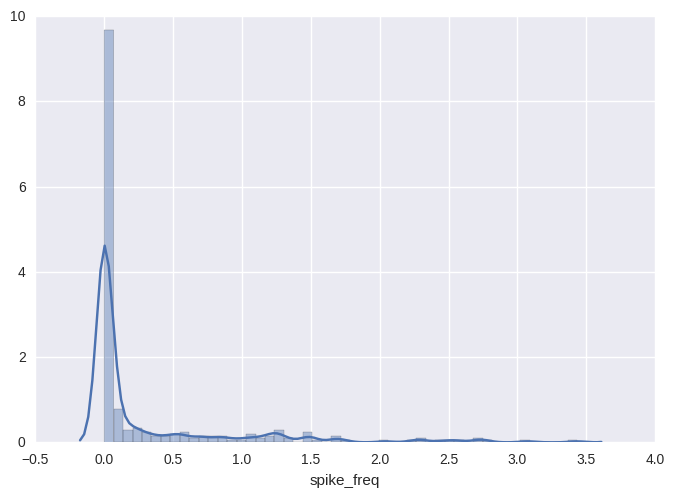

In [24]:
mean_freqs_after_removal = after_ttx_table.groupby(('unit_name', 'condition'))['spike_freq'].mean()/60
sns.distplot(mean_freqs_after_removal)
plt.savefig('spike_freq_dist_after_ttx_rmvl.png')

In [29]:
print len(mean_freqs_after_removal)
print sum(mean_freqs_after_removal > 0)
print float(sum(mean_freqs_after_removal > 0))/len(mean_freqs_after_removal)

           unit_name  spike_freq
condition                       
no_ttx           162         162
ttx              139         139
232
0.770764119601


In [36]:
ttx_freqs = mean_freqs_after_removal.rename('mean_freq').reset_index().query('condition == "ttx"') 
print len(ttx_freqs)
print sum(ttx_freqs['mean_freq'] > 0)
print float(sum(ttx_freqs['mean_freq'] > 0))/len(ttx_freqs)

139
101
0.726618705036


In [37]:
ttx_freqs = mean_freqs_after_removal.rename('mean_freq').reset_index().query('condition == "no_ttx"') 
print len(ttx_freqs)
print sum(ttx_freqs['mean_freq'] > 0)
print float(sum(ttx_freqs['mean_freq'] > 0))/len(ttx_freqs)

162
131
0.808641975309


In [39]:
spike_sums = condition_mat.groupby('time')['spike_freq'].sum()
recording_mat = condition_mat[spike_sums > 0]

/home/sam/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


IndexingError: Unalignable boolean Series key provided

In [40]:
spike_sums > 0

time
2017-04-25 13:15:09    True
2017-04-25 13:16:09    True
2017-04-25 13:17:09    True
2017-04-25 13:18:09    True
2017-04-25 13:19:09    True
2017-04-25 13:20:09    True
2017-04-25 13:21:09    True
2017-04-25 13:22:09    True
2017-04-25 13:23:09    True
2017-04-25 13:24:09    True
2017-04-25 13:25:09    True
2017-04-25 13:26:09    True
2017-04-25 13:27:09    True
2017-04-25 13:28:09    True
2017-04-25 13:29:09    True
2017-04-25 13:30:09    True
2017-04-25 13:31:09    True
2017-04-25 13:32:09    True
2017-04-25 13:33:09    True
2017-04-25 13:34:09    True
2017-04-25 13:35:09    True
2017-04-25 13:36:09    True
2017-04-25 13:37:09    True
2017-04-25 13:38:09    True
2017-04-25 13:39:09    True
2017-04-25 13:40:09    True
2017-04-25 13:41:09    True
2017-04-25 13:42:09    True
2017-04-25 13:43:09    True
2017-04-25 13:44:09    True
                       ... 
2017-04-30 10:57:09    True
2017-04-30 10:58:09    True
2017-04-30 10:59:09    True
2017-04-30 11:00:09    True
2017-04-30 11:0